### Test particle densities, focus, field of camera etc.

Second test

Two depths of light sheet: 4.2 cm and 5.5 cm. Water straified adding 800 g salt to bucket 1.
Original mix of particles

In [2]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import img_as_int

In [202]:
frame_a1  = openpiv.tools.imread( '../27May19_PIV1/frames_depth_4p2_cm/img_0059.jpg' )
frame_b1  = openpiv.tools.imread( '../27May19_PIV1/frames_depth_4p2_cm/img_0063.jpg' )
frame_a2  = openpiv.tools.imread( '../27May19_PIV1/frames_depth_4p2_cm_bis/img_0004.jpg' )
frame_b2  = openpiv.tools.imread( '../27May19_PIV1/frames_depth_4p2_cm_bis/img_0010.jpg' )


In [203]:
print(frame_a1.shape)
print(frame_a2.dtype) # result is (1080, 1920) and float64

(1080, 1920)
float64


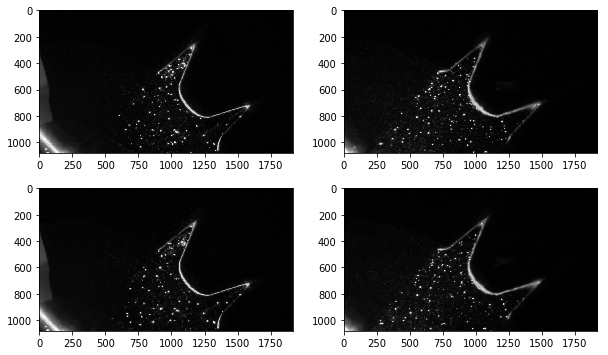

In [204]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(frame_a1, cmap='gray')
ax[0,1].imshow(frame_a2, cmap='gray')
ax[1,0].imshow(frame_b1, cmap='gray')
ax[1,1].imshow(frame_b2, cmap='gray')

In [205]:
frame_a1_int = img_as_int(1-frame_a1)
frame_b1_int = img_as_int(1-frame_b1)
frame_a2_int = img_as_int(1-frame_a2)
frame_b2_int = img_as_int(1-frame_b2)

/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))


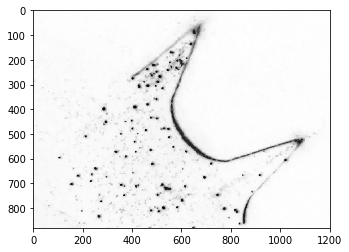

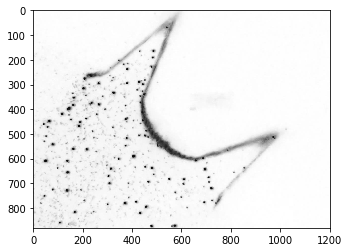

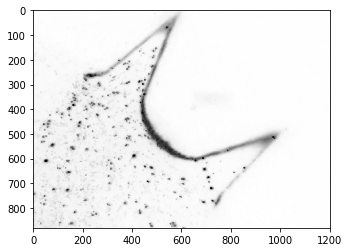

In [206]:
#500:1700
plt.imshow(frame_a1_int[200:,500:1700].astype(np.int32),cmap='gray')
plt.show()
plt.imshow(frame_a2_int[200:,500:1700].astype(np.int32),cmap='gray')
plt.show()

fra1 = frame_a1_int[200:,500:1700].astype(np.int32)
frb1 = frame_b1_int[200:,500:1700].astype(np.int32)
fra2 = frame_a2_int[200:,500:1700].astype(np.int32)
frb2 = frame_b2_int[200:,500:1700].astype(np.int32)

plt.imshow(frb2+fra2,cmap='gray')
plt.show()



Notes:

    window_size > overlap

In [275]:
window_size = 32
overlap = 16
dt = 5/30
search_area_size = 48

u, v, sig2noise = openpiv.process.extended_search_area_piv(fra2, frb2,
                                                           window_size, 
                                                           overlap=overlap, 
                                                           dt=dt, 
                                                           search_area_size=search_area_size, 
                                                           sig2noise_method='peak2peak')
print(np.shape(u), np.shape(v), np.shape(sig2noise))


/home/kramosmu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


(54, 74) (54, 74) (54, 74)


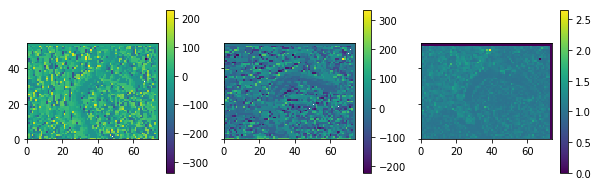

In [276]:
fig, ax = plt.subplots(1,3,figsize=(10,3.0), sharey=True)

pc_u = ax[0].pcolor(u)
plt.colorbar(pc_u, ax=ax[0])
ax[0].set_aspect(1)

pc_v = ax[1].pcolor(v)
plt.colorbar(pc_v, ax=ax[1])
ax[1].set_aspect(1)

pc_s2n = ax[2].pcolor(sig2noise)
plt.colorbar(pc_s2n, ax=ax[2])
ax[2].set_aspect(1)


In [277]:
x, y = openpiv.process.get_coordinates( image_size=fra1.shape, window_size=window_size, overlap=overlap )

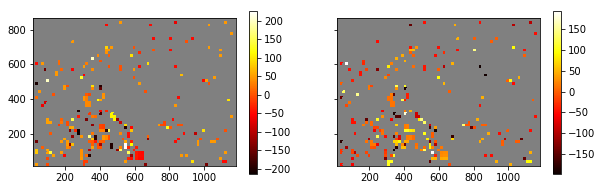

In [284]:
umask, vmask, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3)

cmap = plt.cm.hot
cmap.set_bad('gray', 1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3) ,sharey = True)
mesh1 = ax1.pcolormesh(x,y,umask, cmap=cmap)
mesh2 = ax2.pcolormesh(x,y,vmask, cmap=cmap)
plt.colorbar(mesh1, ax=ax1)
plt.colorbar(mesh2, ax=ax2)

ax1.set_aspect(1)
ax2.set_aspect(1)


/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:64: RuntimeWarning: invalid value encountered in less
  np.logical_or(u < u_thresholds[0], u > u_thresholds[1]), \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:64: RuntimeWarning: invalid value encountered in greater
  np.logical_or(u < u_thresholds[0], u > u_thresholds[1]), \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:65: RuntimeWarning: invalid value encountered in less
  np.logical_or(v < v_thresholds[0], v > v_thresholds[1]) \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:65: RuntimeWarning: invalid value encountered in greater
  np.logical_or(v < v_thresholds[0], v > v_thresholds[1]) \


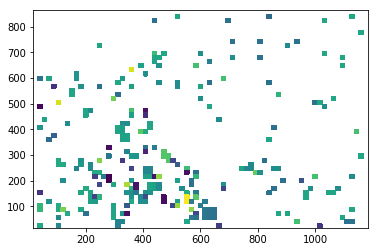

In [285]:
uval, vval, mask = openpiv.validation.global_val( umask, vmask, (-5000, 5000), (-5000, 5000) )
plt.pcolor(x,y,uval)

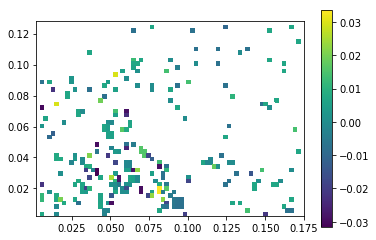

In [286]:
# scaling factor is in pix/m
sca_factor = 1/0.000148
xsca, ysca, usca, vsca = openpiv.scaling.uniform(x, y, uval, vval, scaling_factor = sca_factor )
pc = plt.pcolor(xsca,ysca,usca)
ax = plt.gca()
plt.colorbar(pc, ax=ax)
ax.set_aspect(1)

In [287]:
openpiv.tools.save(xsca, ysca, usca, vsca, mask, 'img02.txt' )

/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


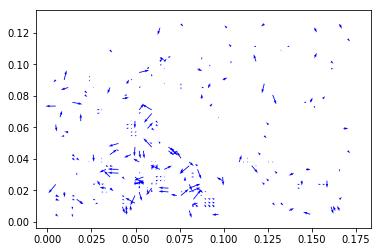

In [288]:
openpiv.tools.display_vector_field('img02.txt', scale=1, width=0.0025)


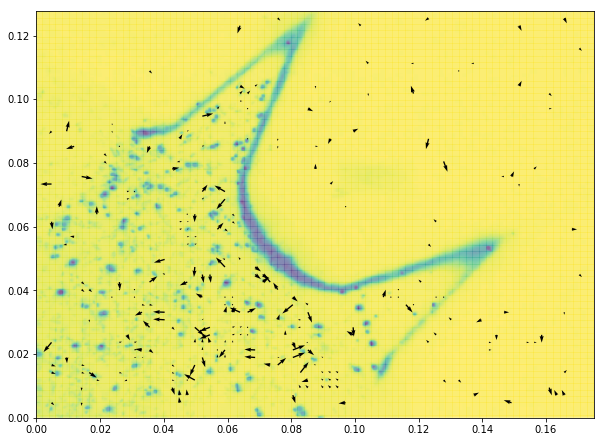

In [289]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(np.linspace(0,np.max(xsca),1200),np.linspace(0,np.max(ysca),880),np.flipud(fra2+frb2), alpha=0.1)
ax.quiver(xsca,ysca,usca,vsca, color='k')
ax.set_aspect(1)


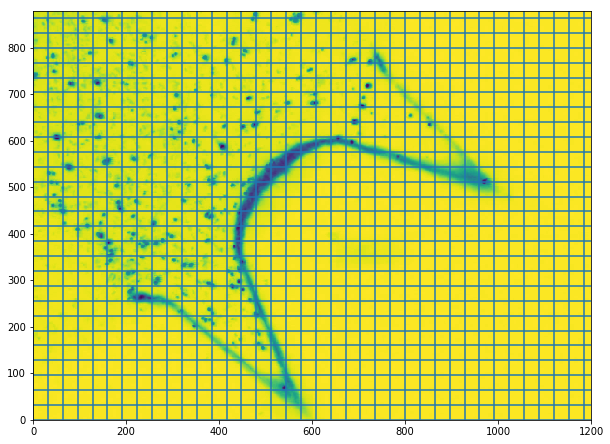

In [290]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(frb2+fra2)
ax.set_aspect(1)

for ii in range(int(np.shape(fra2)[1]/window_size)+1):
    ax.axvline(ii*window_size)
    
for ii in range(int(np.shape(fra2)[0]/window_size)+1):
    ax.axhline(ii*window_size)

In [42]:
np.shape(fra2)

(880, 1200)